# Importing Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Uploading Dataset

In [3]:
df = pd.read_csv('hotel_booking.csv')

# Data Cleaning & Processing

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

In [5]:
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
pd.isnull(df).sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.drop(['company', 'agent'], axis=1, inplace=True)
df.dropna(inplace=True)

In [16]:
df = df[df['adr']<5000]

# Summary Statistics

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# Exploratory Data Analysis & Visualization

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


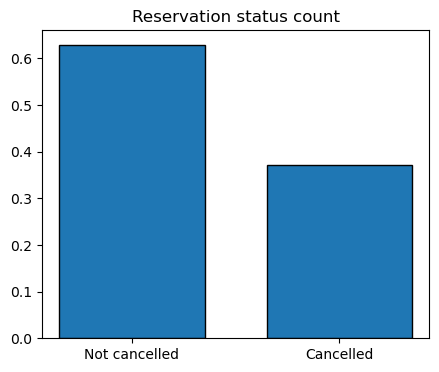

In [21]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled', 'Cancelled'], df['is_canceled'].value_counts(normalize = True), edgecolor = 'k', width = 0.7)
plt.show()

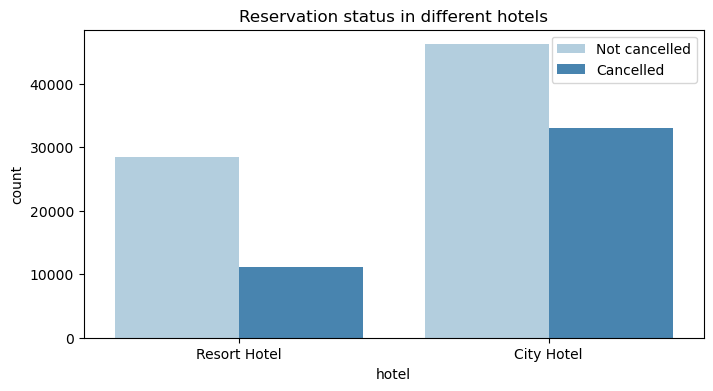

In [31]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
plt.legend(['Not cancelled', 'Cancelled'])
plt.title('Reservation status in different hotels')
plt.show()

In [32]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [33]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [34]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

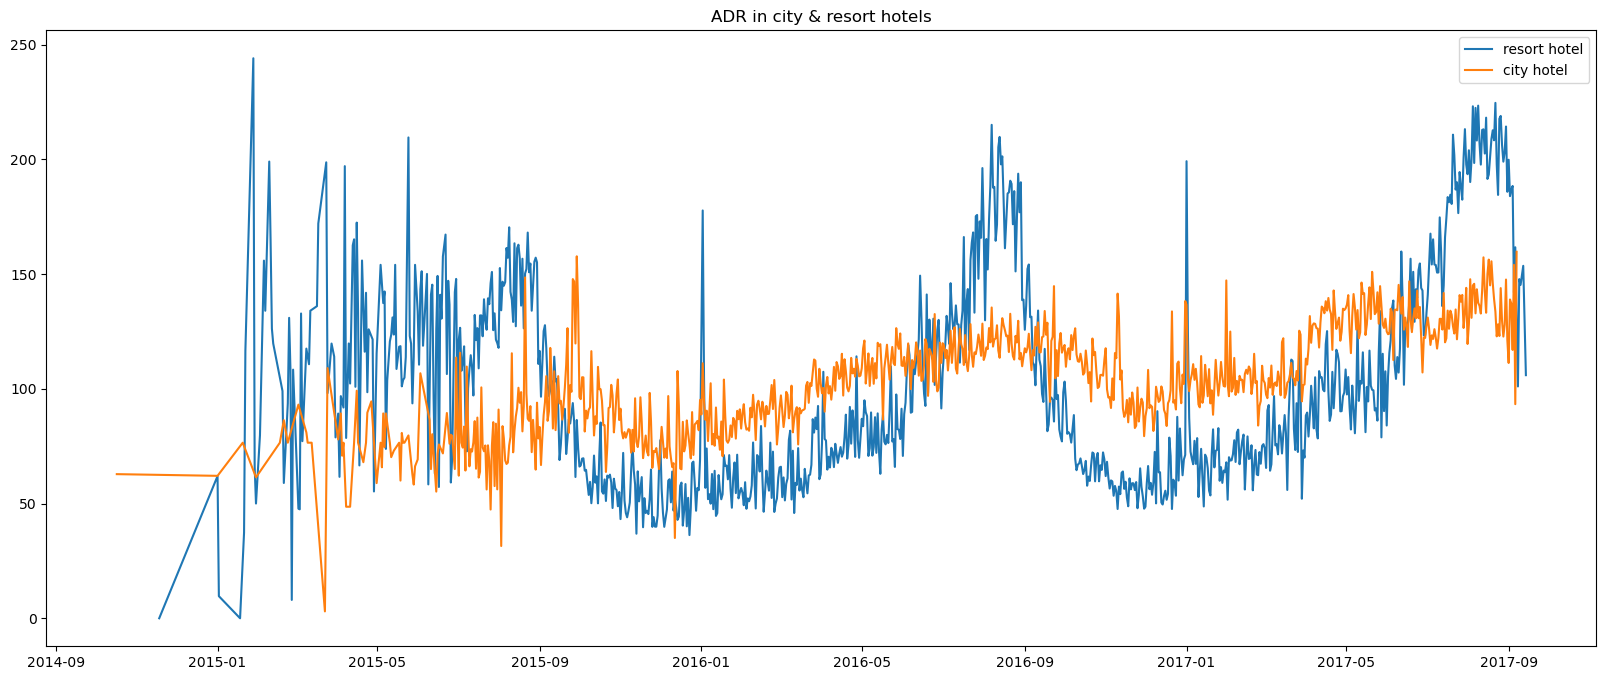

In [36]:
plt.figure(figsize = (20,8))
plt.title('ADR in city & resort hotels')
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'resort hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'city hotel')
plt.legend(['resort hotel', 'city hotel'])
plt.show()

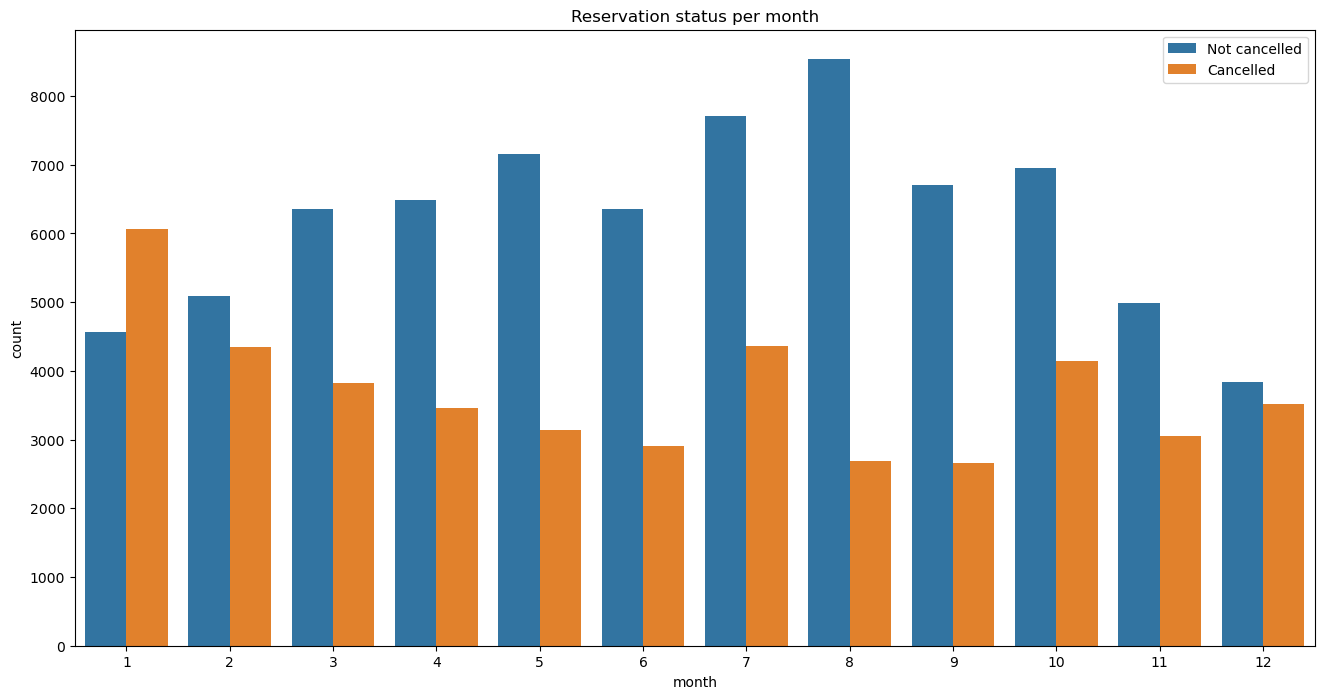

In [38]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df)
plt.legend(['Not cancelled', 'Cancelled'])
plt.title('Reservation status per month')
plt.show()

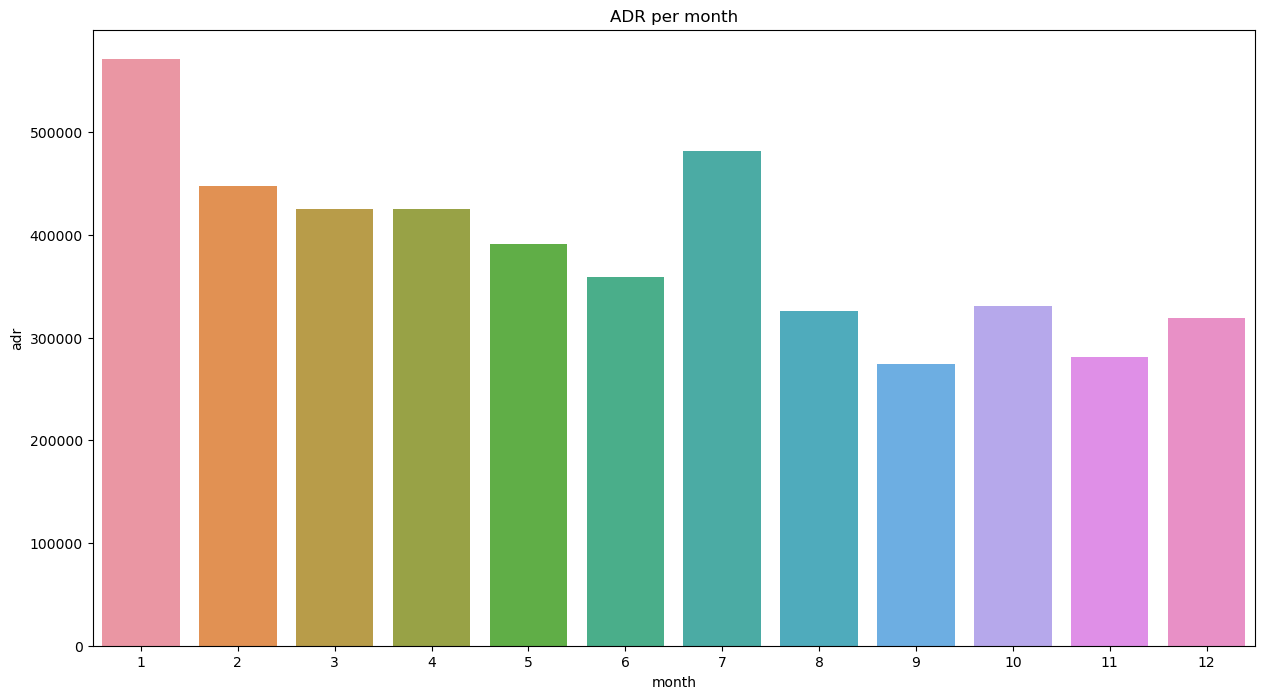

In [50]:
plt.figure(figsize = (15,8))
plt.title('ADR per month')
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

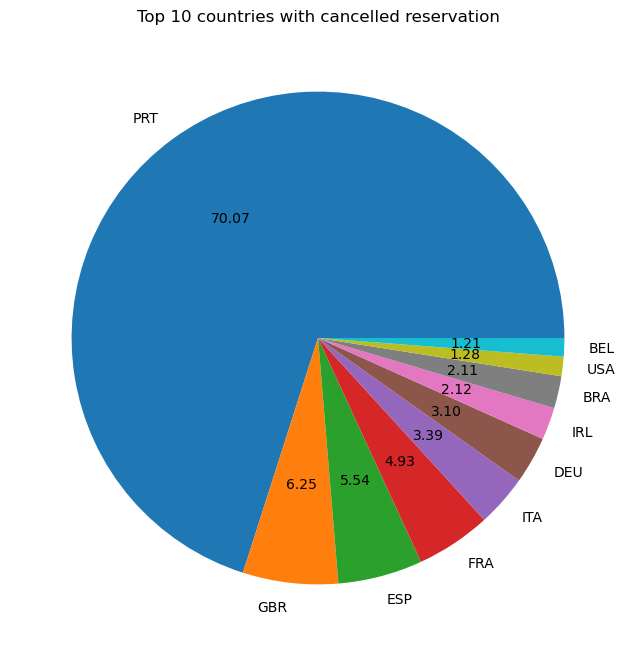

In [54]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with cancelled reservation')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [57]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

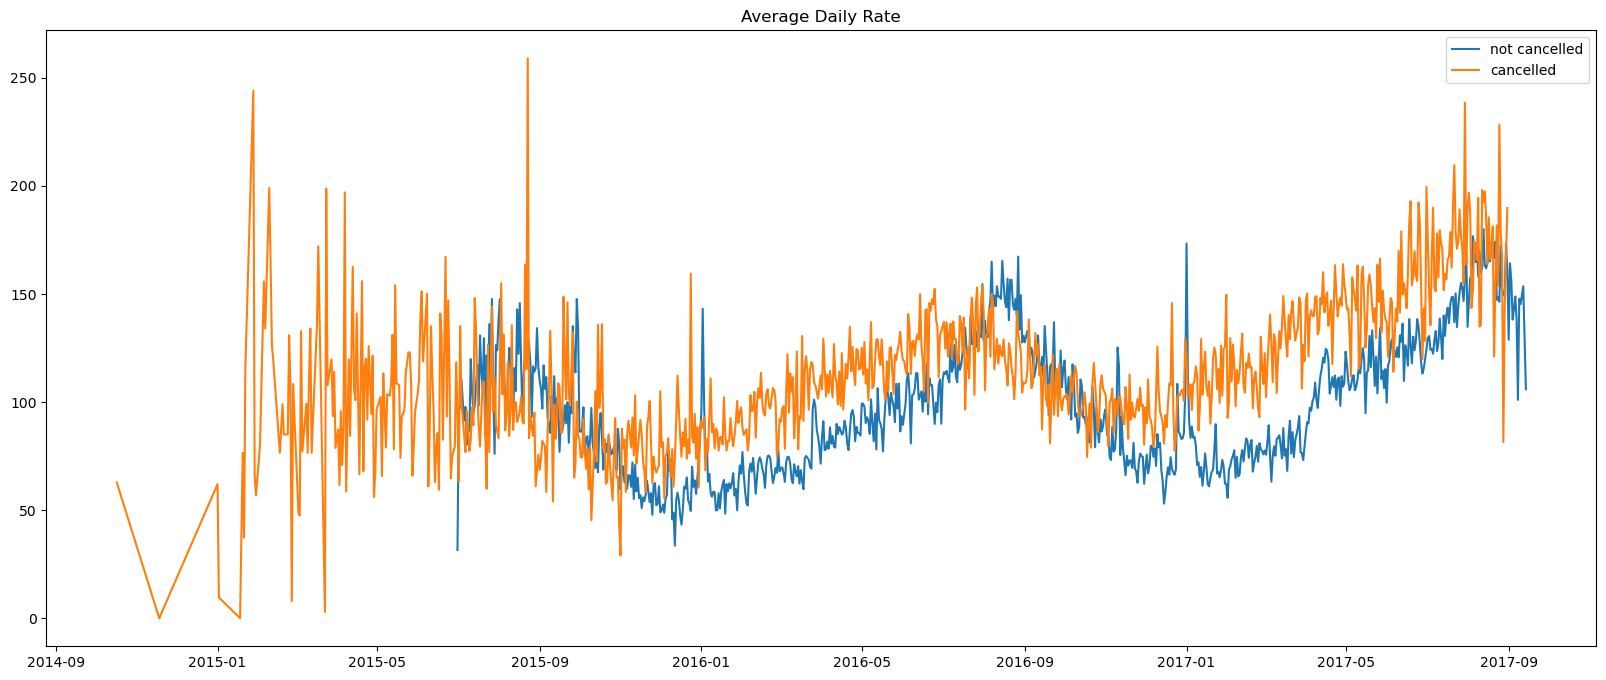

In [59]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

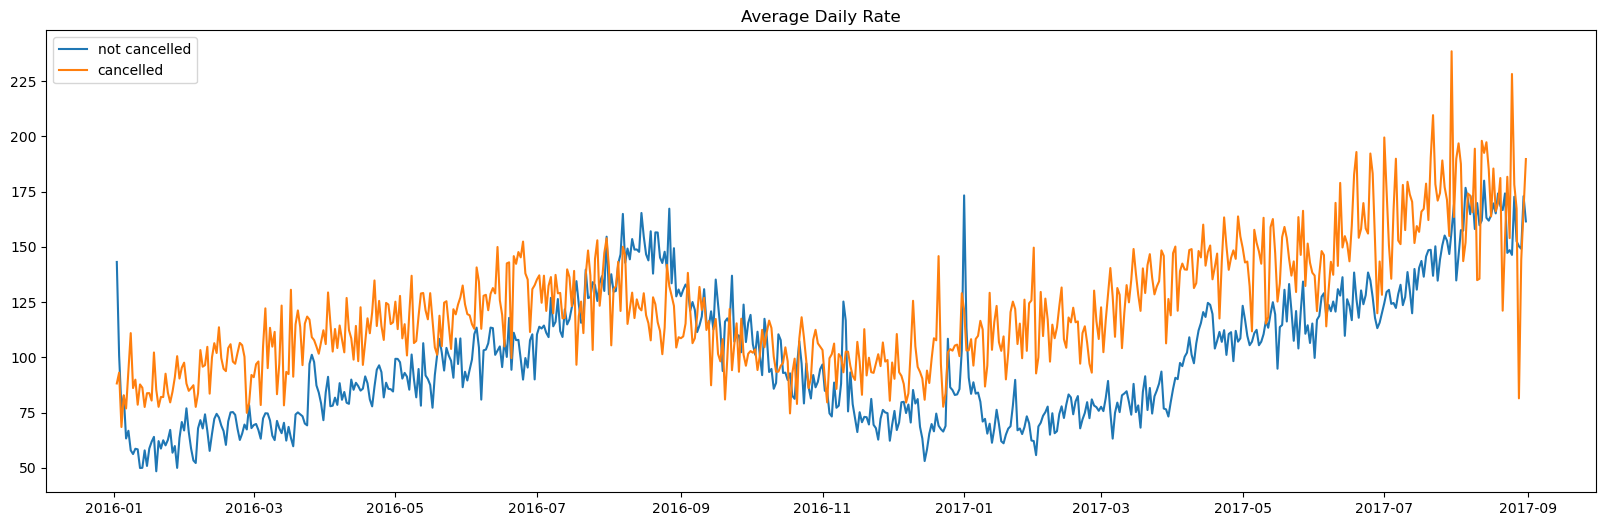

In [63]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

# The End